# <center><b>Prediction of Abalone Age<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>

**5.** [**Data Pre-Profiling**](#Section5)<br>

**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Train test split**](#Section81)<br>
  - **8.2** [**Label Encoding**](#Section82)<br>
  - **8.3** [**Model creation**](#Section83)<br>
  - **8.3.1** [**Linear Regression**](#Section831)<br>
  - **8.3.2** [**Decision Tree Regressor**](#Section832)<br>
  - **8.3.3** [**GridSearchCV**](#Section833)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Abalones** are marine snails.

- The flesh of abalones is widely considered to be a **desirable food**, and is consumed **raw** or **cooked** by a variety of **cultures**. 

- The age of **abalone** is determined by cutting the shell through the cone, staining it, and counting the **number of rings** through a microscope.

- The **economic value** of **abalone** is **positively correlated** with its **age**. Therefore, to detect the **age of abalone** accurately is important for both farmers and customers to determine its price.

<center><img width=40% src="https://m.media-amazon.com/images/I/814bKET-F8L._AC_SL1500_.jpg"></center>

- The case study considers a report collected from various parameters of the abalones like their sex, length, diameter, height, weight, etc.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Predicting the **age** of abalone without **cone and staining** is very important.
- This can be done by **predicting a number of rings** by its various other parameters like sex, length, diameters, height and weight.
- In a **data science** role I have been hired to analyse and create a model which can predict **rings** in abalone.
- Adding rings with **1.5** will give **approx age** of abalone and thus provide an appropriate **price**.
- This would be a **leading step** to helping the farmers and customers.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.3f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import re

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about featurs of **Abalone** like **sex**, **length**, **diameters**, **height**, **weight** number of rings.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 3341 | 10 | 261.2 KB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Id | Unique id of each dataset |
|2| Sex | Sex of abalone  |
|3| Length |	Longest shell measurement (mm)|
|4| Diameter |	Diameter of abalone perpendicular to length (mm) |
|5| Height |	Height of abalone with meat in the shell (mm) |
|6| Whole_weight |	Weight of the whole abalone (grams) |
|7| Shucked_weight |	Weight of the meat of abalone (grams) |
|8| Viscera_weight |	Gut weight (after bleeding) of the abalone (grams)|
|9| Shell_weight |	Weight of the abalone after being dried (grams)|
|10| Rings | 	Number of Rings in the abalone|

In [2]:
ds_aba = pd.read_csv('abalone_train.csv')
print('Data shape : ', ds_aba.shape)
ds_aba.head()

Data shape :  (3341, 10)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.033,0.015,0.007,0.010,5
1,3521,I,0.215,0.150,0.055,0.041,0.015,0.009,0.013,3
2,883,M,0.660,0.530,0.170,1.391,0.591,0.212,0.453,15
3,3627,M,0.715,0.525,0.200,1.890,0.950,0.436,0.430,10
4,2106,M,0.595,0.455,0.155,1.041,0.416,0.210,0.365,14


In [3]:
ds_aba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


**Observations:**

- We can see there are total **3341** records and **10** features.

- Feature **Rings** will be used as the target variable where the model will predict numbers of rings in abalone.
- There is no missing value in the given dataset.
- We have only once categorical variable as Sex.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

In [4]:
ds_aba[ds_aba.duplicated()].shape

(0, 10)

In [5]:
ds_aba.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000
mean,2085.442,0.526,0.409,0.140,0.838,0.364,0.183,0.241,9.958
std,1197.722,0.120,0.099,0.043,0.494,0.224,0.110,0.140,3.206
min,0.000,0.075,0.055,0.000,0.002,0.001,0.001,0.002,1.000
25%,1055.000,0.450,0.350,0.115,0.445,0.188,0.093,0.132,8.000
50%,2086.000,0.545,0.425,0.145,0.810,0.342,0.172,0.235,10.000
75%,3114.000,0.620,0.485,0.165,1.169,0.509,0.256,0.330,11.000
max,4175.000,0.815,0.650,1.130,2.780,1.488,0.760,1.005,27.000


In [6]:
ds_aba[ds_aba.Height == 0]

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1311,1257,I,0.430,0.340,0.000,0.428,0.206,0.086,0.115,8
2442,3996,I,0.315,0.230,0.000,0.134,0.058,0.029,0.350,6


#### We will check the mean and median of the Infant class

In [7]:
ds_aba[ds_aba.Sex == 'I'].describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,1051.000,1051.000,1051.000,1051.000,1051.000,1051.000,1051.000,1051.000,1051.000
mean,2164.152,0.428,0.327,0.108,0.430,0.190,0.092,0.128,7.896
std,1149.244,0.108,0.087,0.032,0.283,0.127,0.061,0.084,2.495
min,5.000,0.075,0.055,0.000,0.002,0.001,0.001,0.002,1.000
25%,1235.500,0.360,0.270,0.090,0.213,0.091,0.044,0.065,6.000
50%,2041.000,0.435,0.335,0.110,0.381,0.169,0.080,0.113,8.000
75%,3113.500,0.510,0.390,0.130,0.596,0.265,0.128,0.178,9.000
max,4166.000,0.725,0.550,0.220,2.050,0.773,0.441,0.655,21.000


In [8]:
ds_aba.Sex.value_counts()

M    1232
F    1058
I    1051
Name: Sex, dtype: int64

**Observations:**

- There are no **missing** and **duplicates** values.
- It seems to be two reconds have **outliers** having value for height i.e. **0**.
- As Sex was an **infant** and we check the mean of that as **0.108** we will replace 0 with the mean of infant value

#### We will check other outliers using IQR

In [9]:
ds_info = ds_aba.describe()
for c in ds_info.columns.to_list():
    print('Column Name : ',c)
    IQR = (ds_info[c]['75%'] - ds_info[c]['25%'])*1.5
    NIQR_value = ds_info[c]['25%'] - IQR
    PIQR_value = ds_info[c]['75%'] + IQR
    print('Shape of negative outliers = ', ds_aba[ds_aba[c] < NIQR_value].shape[0])
    print('Shape of positive outliers = ', ds_aba[ds_aba[c] > PIQR_value].shape[0])
    print('')

Column Name :  Id
Shape of negative outliers =  0
Shape of positive outliers =  0

Column Name :  Length
Shape of negative outliers =  30
Shape of positive outliers =  0

Column Name :  Diameter
Shape of negative outliers =  36
Shape of positive outliers =  0

Column Name :  Height
Shape of negative outliers =  19
Shape of positive outliers =  5

Column Name :  Whole_weight
Shape of negative outliers =  0
Shape of positive outliers =  21

Column Name :  Shucked_weight
Shape of negative outliers =  0
Shape of positive outliers =  38

Column Name :  Viscera_weight
Shape of negative outliers =  0
Shape of positive outliers =  20

Column Name :  Shell_weight
Shape of negative outliers =  0
Shape of positive outliers =  31

Column Name :  Rings
Shape of negative outliers =  12
Shape of positive outliers =  210



**Observations:**

- Every **independent** variable has some outliers.
- **Target** variables are too many outliers.
- Data is collected from dependable sources so will not treat any outliers.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- In the above analysis we are replacing height with infant mean.

In [10]:
height_mean = ds_aba[ds_aba.Sex == 'I'].Height.mean()
ds_aba.loc[ds_aba.Height == 0,'Height'] = height_mean

In [11]:
ds_aba.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000,3341.000
mean,2085.442,0.526,0.409,0.140,0.838,0.364,0.183,0.241,9.958
std,1197.722,0.120,0.099,0.042,0.494,0.224,0.110,0.140,3.206
min,0.000,0.075,0.055,0.010,0.002,0.001,0.001,0.002,1.000
25%,1055.000,0.450,0.350,0.115,0.445,0.188,0.093,0.132,8.000
50%,2086.000,0.545,0.425,0.145,0.810,0.342,0.172,0.235,10.000
75%,3114.000,0.620,0.485,0.165,1.169,0.509,0.256,0.330,11.000
max,4175.000,0.815,0.650,1.130,2.780,1.488,0.760,1.005,27.000


<a name = Section7></a>

---
# **7. Exploratory Data Analysis**
---

In [12]:
ds_aba.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.033,0.015,0.007,0.010,5
1,3521,I,0.215,0.150,0.055,0.041,0.015,0.009,0.013,3
2,883,M,0.660,0.530,0.170,1.391,0.591,0.212,0.453,15
3,3627,M,0.715,0.525,0.200,1.890,0.950,0.436,0.430,10
4,2106,M,0.595,0.455,0.155,1.041,0.416,0.210,0.365,14


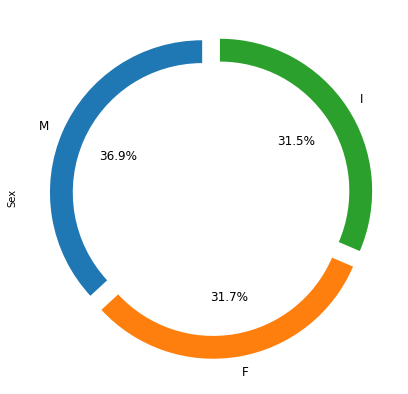

In [13]:
ds_aba.Sex.value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(3)/15,
                                                                figsize=(7, 7),
                                                                fontsize=12, 
                                                                startangle=90,
                                                                label='Sex')
plt.show()

**Observations:**

- We have a total of **40% Male, 31.5% Infant** and **31.7 % Female**.
- Data is almost **equally** distributed among sex.
- We will not get a **biased** problem.

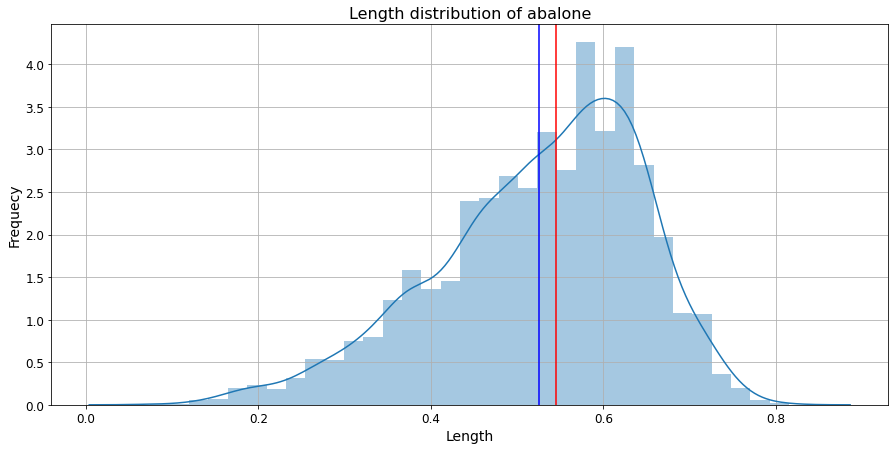

In [14]:
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_aba['Length'], kde=True)

# Add some cosmetics
plt.title(label='Length distribution of abalone', size=16)
plt.xlabel(xlabel='Length', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.axvline(ds_aba.Length.mean(), color = 'b')
plt.axvline(ds_aba.Length.median(), color = 'r')

# Display the plot
plt.show()

**Observations:**

- Length of abalone is **right skewed**. 
- There is **0.019 mm** difference between mean and median.
- Most of data is in between **0.5 mm** to **0.7 mm** range. 

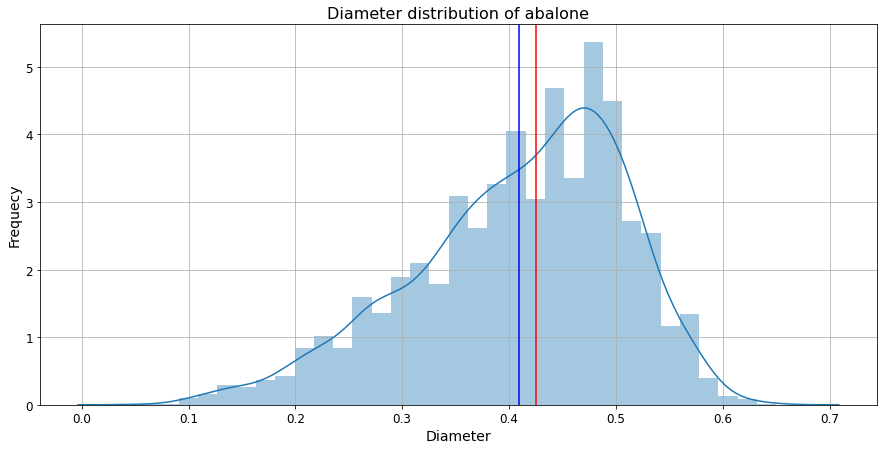

In [15]:
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_aba.Diameter, kde=True)

# Add some cosmetics
plt.title(label='Diameter distribution of abalone', size=16)
plt.xlabel(xlabel='Diameter', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.axvline(ds_aba.Diameter.mean(), color = 'b')
plt.axvline(ds_aba.Diameter.median(), color = 'r')

# Display the plot
plt.show()

**Observations:**

- Diameter of abalone is **right skewed**. 
- There is **0.016 mm** difference between mean and median.
- Most of data is in between **0.4 mm** to **0.5 mm** range. 

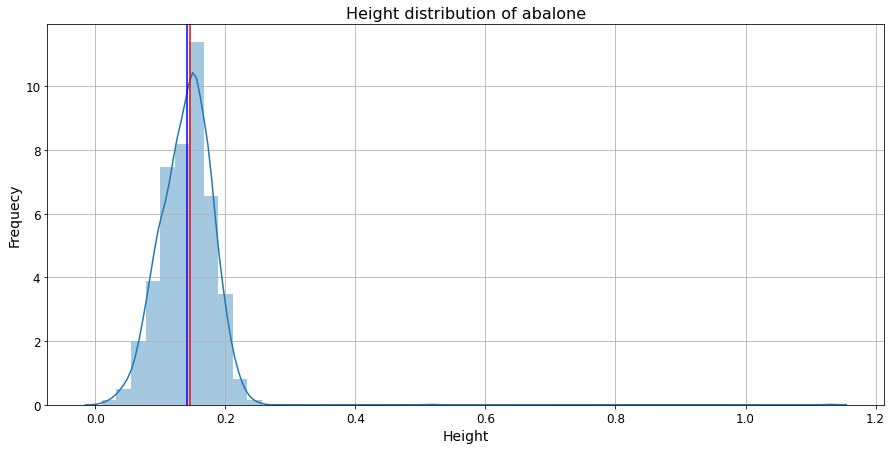

In [16]:
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_aba.Height, kde=True)

# Add some cosmetics
plt.title(label='Height distribution of abalone', size=16)
plt.xlabel(xlabel='Height', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.axvline(ds_aba.Height.mean(), color = 'b')
plt.axvline(ds_aba.Height.median(), color = 'r')

# Display the plot
plt.show()

**Observations:**

- Height is normally distributed. 
- There are very few abalones whose height is between 0.3 to 1.13.
- It is very negligible. 

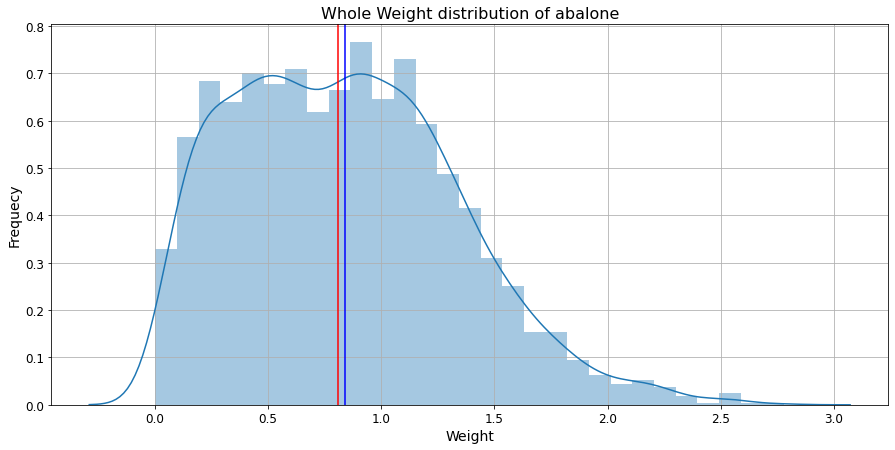

In [17]:
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_aba.Whole_weight, kde=True)

# Add some cosmetics
plt.title(label='Whole Weight distribution of abalone', size=16)
plt.xlabel(xlabel='Weight', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.axvline(ds_aba.Whole_weight.mean(), color = 'b')
plt.axvline(ds_aba.Whole_weight.median(), color = 'r')

# Display the plot
plt.show()

**Observations:**

- Weight is normally distributed. 
- There are many  abalones whose height is between 0.1 to 1.4.

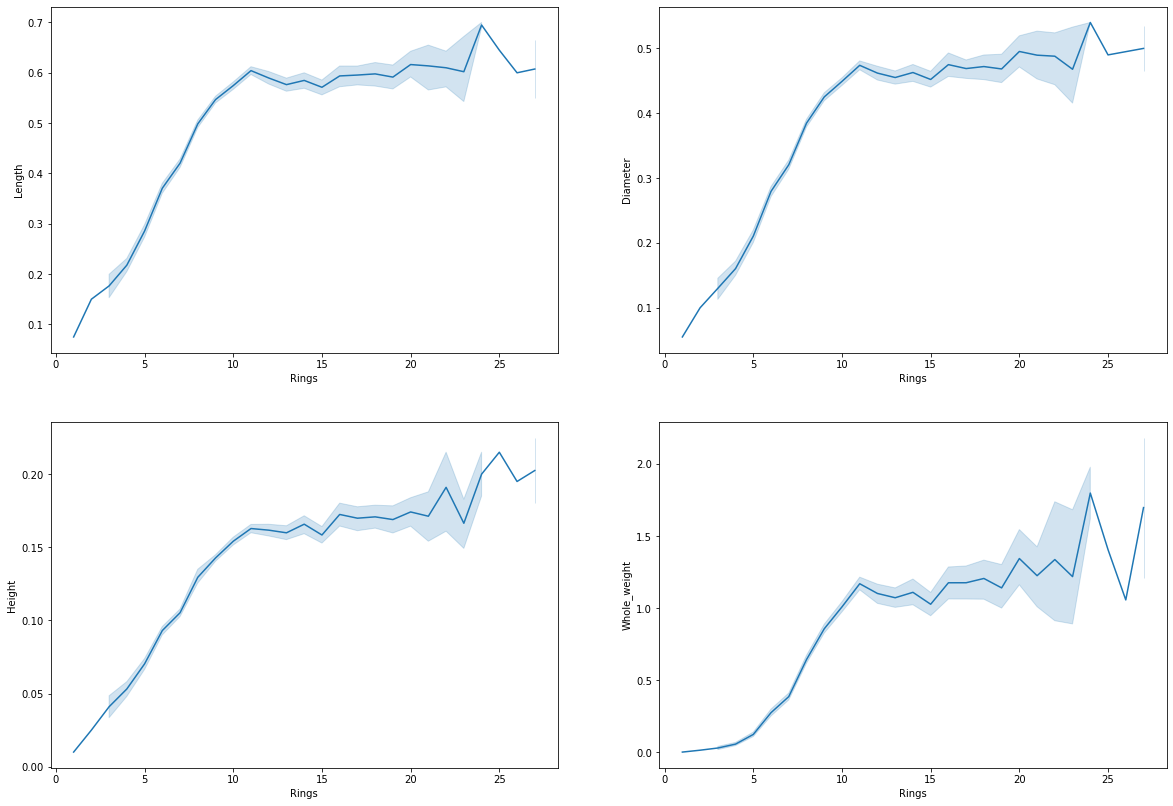

In [18]:
fig = plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.lineplot(data=ds_aba, x="Rings", y="Length")
plt.subplot(2,2,2)
sns.lineplot(data=ds_aba, x="Rings", y="Diameter")
plt.subplot(2,2,3)
sns.lineplot(data=ds_aba, x="Rings", y="Height")
plt.subplot(2,2,4)
sns.lineplot(data=ds_aba, x="Rings", y="Whole_weight")
plt.show()

**Observations:**

- Number of **rings increases** with an increase in **length**, **diameter**, **height** and **weight** of abalone. 
- But after 10 rings length, diameter, height and weight are almost **constant**.
- There is a small deflection after 20 rings. 

<a name = Section8></a>

---
# **8. Post Data Processing**
---

In [19]:
X = ds_aba.drop(['Id','Rings'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,I,0.180,0.135,0.080,0.033,0.015,0.007,0.010
1,I,0.215,0.150,0.055,0.041,0.015,0.009,0.013
2,M,0.660,0.530,0.170,1.391,0.591,0.212,0.453
3,M,0.715,0.525,0.200,1.890,0.950,0.436,0.430
4,M,0.595,0.455,0.155,1.041,0.416,0.210,0.365


In [20]:
y = ds_aba.Rings

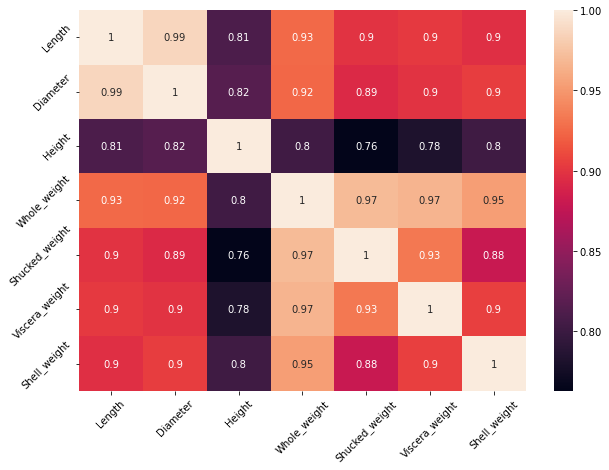

In [88]:
fig = plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True );
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

**Observations:**

- **Length** and **diameters** are **highly** correlated.
- All types of **weight** are **highly** correalted with each other.  
- There is a small deflection after 20 rings. 

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop various model** which will predict rings of abalones based on its various parameters. 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **RMSE** score to evaluate problem.

<a name = Section81></a>
### **8.1 Train test split**

- Train test split. Keeping 20% data in test data.

In [22]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=10,stratify=X['Sex'])

In [23]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (2672, 8)
y_train shape:  (2672,)

Test cases as below
X_test shape:  (669, 8)
y_test shape:  (669,)


**Observations:**

- Split train and test data with **20%** of test data from an actual dataset.
- Used random state as **10** for randomness.  
- Stratify with **sex** so that both train and test data have an **equal proportion** of Sex. 

<a name = Section82></a>
### **8.2 Label Encoding**

- Encode target labels with value between 0 and n_classes-1.

In [24]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

<a name = Section83></a>
### **8.3 Model creation**

- Model creation for abalone dataset

<a name = Section831></a>
#### **8.3.1 Linear Regression**

- Creation of linear model with default paramters.

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test) 

In [31]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('------------------------------------------------------------------')
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))
print('------------------------------------------------------------------')

r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))
print('------------------------------------------------------------------')

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))
print('------------------------------------------------------------------')

------------------------------------------------------------------
RMSE for training set is 2.2072318250772294
RMSE for test set is 2.2017332708749398
------------------------------------------------------------------
R2 score for training set is 0.524547745574389
R2 score for test set is 0.531583661433872
------------------------------------------------------------------
Adjusted R2 score for training set is 0.5231194248701438
Adjusted R2 score for test set is 0.5259058876330704
------------------------------------------------------------------


**Observations:**

- **RMSE** is **2.21** for **train** and **2.20** for **test** data.
- **R2** and **Adjusted R2** are almost near to each other for test and train data.  
- We will go for a different model to see the difference. 

<a name = Section832></a>
#### **8.3.2 Decision Tree Regressor**

- Creation of Decision Tree Regressor model by providing some hyper parameters.

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=5,
                           min_samples_split=6,
                           max_leaf_nodes=10)
dtm.fit(X_train, y_train)
y_pred_train_d = dtm.predict(X_train)  
y_pred_test_d = dtm.predict(X_test) 

In [41]:
RMSE_train_d = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_d))
RMSE_test_d = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_d))
print('------------------------------------------------------------------')
print('RMSE for training set is {}'.format(RMSE_train_d))
print('RMSE for test set is {}'.format(RMSE_test_d))
print('------------------------------------------------------------------')

r2_train_d = metrics.r2_score(y_train,y_pred_train_d)
r2_test_d = metrics.r2_score(y_test,y_pred_test_d)
print("R2 score for training set is {}".format(r2_train_d))
print("R2 score for test set is {}".format(r2_test_d))
print('------------------------------------------------------------------')

adj_r_squared_train_d = 1 - (1-r2_train_d)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test_d = 1 - (1-r2_test_d)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train_d))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test_d))
print('------------------------------------------------------------------')

------------------------------------------------------------------
RMSE for training set is 2.3120032673157995
RMSE for test set is 2.3615256803670786
------------------------------------------------------------------
R2 score for training set is 0.4783395650185981
R2 score for test set is 0.4611250817213457
------------------------------------------------------------------
Adjusted R2 score for training set is 0.47677242890149285
Adjusted R2 score for test set is 0.4545932645300892
------------------------------------------------------------------


**Observations:**

- Result of **RMSE** is almost the same as of **Linear** model.
- **R2** and **Adjusted R2** have decreased a little bit.
- We will fine-tune the model with **GridSearchCV** to see the difference. 

<a name = Section833></a>
#### **8.3.3 GridSearchCV**

- Hyperparameter tuning with GridSearchCV.

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

param_grid = {"criterion": ["mse", "mae","poisson"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [6, 7, 8, 10, 12],
              "min_samples_leaf": [10,15, 18, 20, 22, 25],
              "max_leaf_nodes": [15, 18, 20, 22, 25, 30],
              "random_state": [4, 5, 6, 7],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10,
                                             min_samples_split=6),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [6, 7, 8, 10, 12],
                         'max_leaf_nodes': [15, 18, 20, 22, 25, 30],
                         'min_samples_leaf': [10, 15, 18, 20, 22, 25],
                         'min_samples_split': [10, 20, 40],
                         'random_state': [4, 5, 6, 7]})

In [48]:
y_pred_train_gc = grid_cv_dtm.best_estimator_.predict(X_train)  
y_pred_test_gc = grid_cv_dtm.best_estimator_.predict(X_test) 

RMSE_train_gc = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_gc))
RMSE_test_gc = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gc))
print('------------------------------------------------------------------')
print('RMSE for training set is {}'.format(RMSE_train_gc))
print('RMSE for test set is {}'.format(RMSE_test_gc))
print('------------------------------------------------------------------')

r2_train_gc = metrics.r2_score(y_train,y_pred_train_gc)
r2_test_gc = metrics.r2_score(y_test,y_pred_test_gc)
print("R2 score for training set is {}".format(r2_train_gc))
print("R2 score for test set is {}".format(r2_test_gc))
print('------------------------------------------------------------------')

adj_r_squared_train_gc = 1 - (1-r2_train_gc)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test_gc = 1 - (1-r2_test_gc)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train_gc))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test_gc))
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')
print('')
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))
print('------------------------------------------------------------------')

------------------------------------------------------------------
RMSE for training set is 2.1192662628269847
RMSE for test set is 2.23962860853703
------------------------------------------------------------------
R2 score for training set is 0.5616893115978394
R2 score for test set is 0.5153205152223843
------------------------------------------------------------------
Adjusted R2 score for training set is 0.5603725690115768
Adjusted R2 score for test set is 0.509445612376595
------------------------------------------------------------------
------------------------------------------------------------------

Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_leaf': 25, 'min_samples_split': 10, 'random_state': 4}
------------------------------------------------------------------


**Observations:**

- There is improvement in **RMSE** from other models.
- **R2** and **Adjusted R2** have improved a little bit.
- We will choose GrivdSearchCV and evaluate performance in test data. 

In [50]:
ds_real_aba = pd.read_csv('abalone_test.csv')
print('Data shape : ', ds_real_aba.shape)
ds_real_aba.head()

Data shape :  (836, 9)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.917,0.278,0.243,0.335
1,1580,I,0.500,0.400,0.120,0.616,0.261,0.143,0.194
2,3784,M,0.620,0.480,0.155,1.256,0.527,0.374,0.318
3,463,I,0.220,0.165,0.055,0.054,0.021,0.012,0.020
4,2615,M,0.645,0.500,0.175,1.510,0.673,0.376,0.378


In [52]:
ds_real_aba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              836 non-null    int64  
 1   Sex             836 non-null    object 
 2   Length          836 non-null    float64
 3   Diameter        836 non-null    float64
 4   Height          836 non-null    float64
 5   Whole_weight    836 non-null    float64
 6   Shucked_weight  836 non-null    float64
 7   Viscera_weight  836 non-null    float64
 8   Shell_weight    836 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 58.9+ KB


In [53]:
ds_real_aba.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,836.000,836.000,836.000,836.000,836.000,836.000,836.000,836.000
mean,2098.222,0.516,0.402,0.137,0.791,0.342,0.173,0.229
std,1238.919,0.121,0.100,0.038,0.475,0.212,0.106,0.136
min,1.000,0.140,0.105,0.020,0.015,0.005,0.003,0.005
25%,994.750,0.445,0.345,0.110,0.433,0.178,0.091,0.121
50%,2108.500,0.535,0.420,0.140,0.771,0.320,0.161,0.220
75%,3202.000,0.610,0.475,0.165,1.097,0.472,0.243,0.315
max,4176.000,0.770,0.620,0.240,2.825,1.147,0.641,0.897


**Observations:**

- There is no missing recods in test data.
- All data seems to be in good shape.

#### Choosing independednt variable

In [51]:
X_real = ds_real_aba.drop('Id', axis= 1)

#### Label encoding of testdata

In [54]:
X_real['Sex'] = le.transform(X_real['Sex'])

In [81]:
y_pred_real_gc = grid_cv_dtm.best_estimator_.predict(X_real)  

In [84]:
y_pred_real_arr = np.array(y_pred_real_gc)
ds_real_aba['Rings'] = y_pred_real_arr.tolist()
ds_real_aba.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,668,M,0.550,0.425,0.155,0.917,0.278,0.243,0.335,14.208
1,1580,I,0.500,0.400,0.120,0.616,0.261,0.143,0.194,8.469
2,3784,M,0.620,0.480,0.155,1.256,0.527,0.374,0.318,10.413
3,463,I,0.220,0.165,0.055,0.054,0.021,0.012,0.020,4.234
4,2615,M,0.645,0.500,0.175,1.510,0.673,0.376,0.378,10.993


In [86]:
ds_real_aba[{'Id','Rings'}].to_csv('submission.csv',index=False,header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- After hypertuning we got good results.